In [1]:
import argparse
import uproot
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import awkward as ak
from pathlib import Path
import pickle

from uncertainties import ufloat, unumpy
#import atlas_mpl_style as ampl
#ampl.use_atlas_style(usetex=False)


def Read_Pickle(path):
    with open(path, 'rb') as f:
        data = pickle.load(f)
        
    return data 

In [16]:
period = "ADE"
v = "gluon"
pt='600'
doreweight = 0 #for reweighting syst

var = "ntrk" #ntrk, bdt, newBDT

reweighting_map = {
        "none" : "NoReweighting",
        "quark" : "Reweighting_Quark_Factor",
        "gluon" : "Reweighting_Gluon_Factor"
    }
var_map = {
     "ntrk":'jet_nTracks',
     "bdt":'jet_trackBDT',
     "newBDT":'GBDT_newScore'
    }
    
WPs = [0.5, 0.6, 0.7, 0.8]
bin_edges = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
                11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
                31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
                41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
                51, 52, 53, 54, 55, 56, 57, 58, 59, 60])
bin_centers = 1/2 * (bin_edges[:-1] + bin_edges[1:])

In [17]:
#nominal_SF_path = Path(f"/eos/user/w/wasu/HEP_Repo/QG_Calibration/NewWorkflow/results_CalculateSF/test/nominal/SFs.pkl")
nominal_SF_path = Path(f"/eos/home-w/wasu/NewWorkflow/results_CalculateSF/nominal/closure//ADE/Extractions/{var}_Reweighting_Quark_Factor/{var_map[var]}/MCClosure_{pt}_{v}_{var_map[var]}.pkl")

nominal_SF = Read_Pickle(nominal_SF_path)

pvar = 'extract_p_Quark_MC'

# SFs = {}
# systs = ["eff","fake"]
# for syst in systs:
#     SF_path = Path(f"/eos/user/w/wasu/HEP_Repo/QG_Calibration/NewWorkflow/results_CalculateSF/test/trk_eff/{syst}/SFs.pkl")
#     SFs[syst] = Read_Pickle(SF_path)


In [18]:
unumpy.nominal_values(nominal_SF)
#nominal_SF['Forward_MC']
#SFs['eff'].keys()

array([0.        , 0.        , 0.78196137, 0.91294199, 1.07807501,
       1.34104673, 1.24998724, 1.32363729, 1.20393862, 1.17102986,
       1.13387278, 1.09113969, 1.05939186, 1.03114908, 1.01549216,
       0.99727662, 0.99464598, 0.99522168, 0.98368572, 0.98600318,
       0.97738293, 0.98465059, 0.99546147, 0.98561734, 1.00218391,
       0.99198848, 1.00309157, 1.00098678, 0.99258092, 1.01080495,
       0.99327481, 1.00440932, 1.00458318, 0.97578503, 1.01935884,
       1.00038094, 1.00583739, 0.99302933, 1.00155417, 1.00244083,
       1.00311109, 0.98408575, 0.97584334, 1.06812045, 0.98705093,
       1.01567303, 0.97064896, 1.08329865, 1.03626394, 0.96776654,
       0.99656212, 1.0324729 , 1.00551237, 0.82869127, 1.07775544,
       1.23264438, 0.92476495, 1.18684556, 0.80033248, 0.97840405])

Text(0.5, 0, 'jet_nTracks')

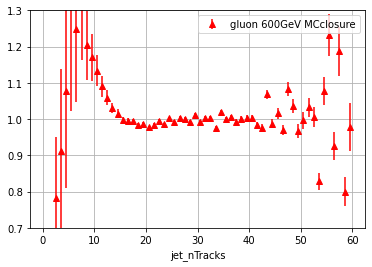

In [19]:
fig, ax = plt.subplots()
ax.errorbar(x = bin_centers, y = unumpy.nominal_values(nominal_SF), yerr = unumpy.std_devs(nominal_SF), label = f"{v} {pt}GeV MCclosure", fmt='r^')
ax.set_ylim(0.7, 1.3)#1.3
ax.legend()
ax.grid()
ax.set_xlabel(f"{var_map[var]}")



/tmp/ipykernel_519/1133091446.py:16: RuntimeWarning: invalid value encountered in true_divide
  ax1.stairs(values = unumpy.nominal_values(SF_quark)/unumpy.nominal_values(SF_quark_eff), edges = bin_edges, color = 'red',label = f"{pvar} eff")
/tmp/ipykernel_519/1133091446.py:17: RuntimeWarning: invalid value encountered in true_divide
  ax1.stairs(values = unumpy.nominal_values(SF_quark)/unumpy.nominal_values(SF_quark_fake), edges = bin_edges, color = 'green',label = f"{pvar} fake")


(0.0, 0.06)

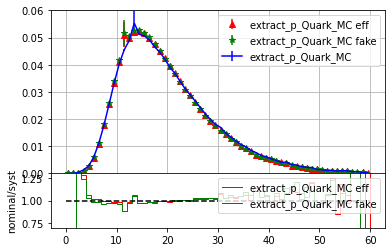

In [10]:
#fig, ax = plt.subplots()
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0})


SF_quark = nominal_SF[pvar]


SF_quark_eff = SFs['eff'][pvar]
SF_quark_fake = SFs['fake'][pvar]

ax0.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_quark_eff), yerr = unumpy.std_devs(SF_quark_eff), label = f"{pvar} eff", fmt='r^')
ax0.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_quark_fake), yerr = unumpy.std_devs(SF_quark_fake), label = f"{pvar} fake", fmt='g*')

ax0.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_quark), yerr = unumpy.std_devs(SF_quark), label = pvar, fmt='b-')

ax1.stairs(values = unumpy.nominal_values(SF_quark)/unumpy.nominal_values(SF_quark_eff), edges = bin_edges, color = 'red',label = f"{pvar} eff")
ax1.stairs(values = unumpy.nominal_values(SF_quark)/unumpy.nominal_values(SF_quark_fake), edges = bin_edges, color = 'green',label = f"{pvar} fake")
ax1.set_ylabel("nominal/syst")
ax1.set_ylim(0.7, 1.3)#1.3
ax1.hlines(y = 1, xmin = 0, xmax = 60, color = 'black', linestyle = '--')

ax0.legend()
ax1.legend()
ax0.grid()
ax0.set_ylim(0., 0.06)



In [11]:
SF_quark_eff = SFs['eff'][pvar]
SF_quark_fake = SFs['fake'][pvar]

ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_quark_eff), yerr = unumpy.std_devs(SF_quark_eff), label = "quark eff", fmt='m.')
ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_quark_fake), yerr = unumpy.std_devs(SF_quark_fake), label = "quark fake", fmt='g-')

ax.legend()
ax.grid()
ax.set_ylim(0., 0.04)


NameError: name 'ax' is not defined

In [56]:


if doreweight:
    SF_path = Path(f"/eos/user/w/wasu/HEP_Repo/QG_Calibration/NewWorkflow/results_CalculateSF/ADE/SFs_pkls/{var}_Reweighting_Gluon_Factor/{var_map[var]}/SFs.pkl")
    SFs = Read_Pickle(SF_path)
    
else:
    systs = ["jet_nTracks_sys_eff","jet_nTracks_sys_fake"]

    for syst in systs:
        SF_path = Path(f"/eos/user/w/wasu/HEP_Repo/QG_Calibration/NewWorkflow/results_CalculateSF/trk_eff/{syst}/ADE/SFs_pkls/{var}_Reweighting_Quark_Factor/{var_map[var]}/SFs.pkl")
        SFs[syst] = Read_Pickle(SF_path)
    

quark trk sys:  [0.05449369 0.05413819 0.05399447 0.04787674 0.04247153 0.03814051] gluon trk sys:  [0.00593854 0.00705844 0.0092146  0.00681075 0.01034748 0.00591123]
quark trk sys:  [0.05612063 0.05313424 0.0531569  0.04595785 0.04209639 0.04722213] gluon trk sys:  [0.00615866 0.00661316 0.00785741 0.01083213 0.01060907 0.00958293]
quark trk sys:  [0.0602178  0.05488623 0.05184805 0.04745796 0.04108456 0.03973796] gluon trk sys:  [0.00426527 0.00476373 0.00537444 0.01271002 0.01104253 0.00761198]
quark trk sys:  [0.05940494 0.05199166 0.04700077 0.04182245 0.03318553 0.03222213] gluon trk sys:  [0.00450297 0.00501355 0.00409795 0.0086236  0.01340809 0.0013322 ]


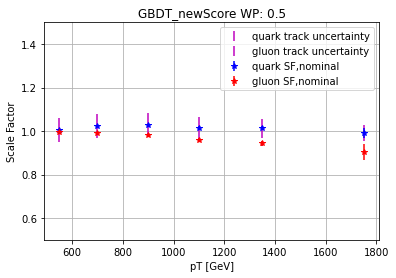

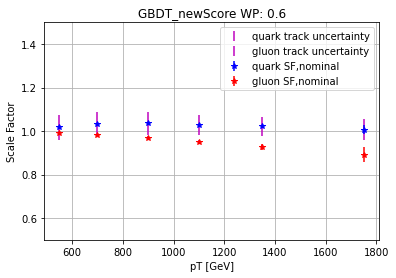

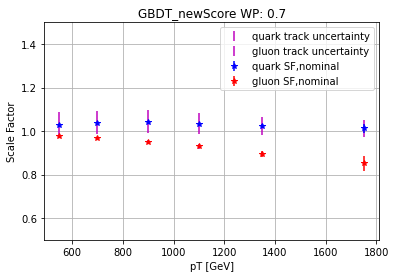

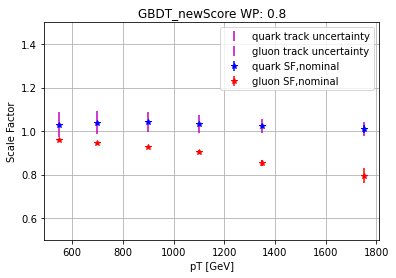

In [57]:
for WP in WPs:
    fig, ax = plt.subplots()
    SF_quark = nominal_SF[f"{var_map[var]}"][WP]['Quark']
    SF_g = nominal_SF[f"{var_map[var]}"][WP]['Gluon']

    if doreweight:
        SF_quark_eff = SFs[f"{var_map[var]}"][WP]['Quark']
        SF_g_eff = SFs[f"{var_map[var]}"][WP]['Gluon']
        err_eff = unumpy.nominal_values(SF_quark - SF_quark_eff)
        err_eff_g = unumpy.nominal_values(SF_g - SF_g_eff)
        ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_quark), yerr =err_eff, linestyle='none',fmt='m',label = f"quark SF syst_reweighting", marker='.')
        ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_g), yerr = err_eff_g, linestyle='none',fmt='m',label = f"gluon SF syst_reweighting", marker='.')


    else:
        SF_quark_eff = SFs["jet_nTracks_sys_eff"][f"{var_map[var]}"][WP]['Quark']
        SF_quark_fake = SFs["jet_nTracks_sys_fake"][f"{var_map[var]}"][WP]['Quark']
        SF_g_eff = SFs["jet_nTracks_sys_eff"][f"{var_map[var]}"][WP]['Gluon']
        SF_g_fake = SFs["jet_nTracks_sys_fake"][f"{var_map[var]}"][WP]['Gluon']
    
        err_eff = unumpy.nominal_values(SF_quark - SF_quark_eff)
        err_fake = unumpy.nominal_values(SF_quark - SF_quark_fake)
        rms = np.sqrt(err_eff**2+err_fake**2)
        
        err_eff_g = unumpy.nominal_values(SF_g - SF_g_eff)
        err_fake_g = unumpy.nominal_values(SF_g - SF_g_fake)
        rms_g = np.sqrt(err_eff_g**2+err_fake_g**2)
    
        ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_quark), yerr = rms, linestyle='none',fmt='none',ecolor = 'm',label = f"quark track uncertainty", marker='.')
        ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_g), yerr = rms_g, linestyle='none',fmt='none',ecolor = 'm',label = f"gluon track uncertainty", marker='.')

        
    ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_quark), yerr = unumpy.std_devs(SF_quark), linestyle='none',fmt = 'b', label = f"quark SF,nominal", marker='*')
    ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_g), yerr = unumpy.std_devs(SF_g), linestyle='none',fmt = 'r', label = f"gluon SF,nominal", marker='*')


    #ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_quark_fake), yerr = unumpy.std_devs(SF_quark_fake), linestyle='none',fmt='g',label = f"quark SF,syst_ntrk_fake", marker='+')
    #ax.errorbar(x = bin_centers, y = unumpy.nominal_values(SF_g), yerr = err_eff_g, linestyle='none',fmt='m',label = f"quark SF syst_ntrk_eff", marker='^')
    ax.legend()

    ax.set_title(f"{var_map[var]} WP: {WP}")
    ax.set_xlabel("pT [GeV]")
    ax.set_ylabel("Scale Factor")
    ax.set_ylim(0.5, 1.5)
    ax.grid()
    if doreweight:
        plt.savefig(f"{var_map[var]}_SF_reweight_{WP}.jpg", dpi=300)
        print("quark reweiting sys: ",err_eff, "gluon reweiting sys: ",err_eff_g)
    else:
        plt.savefig(f"{var_map[var]}_SF_trk_{WP}.jpg", dpi=300)
        print("quark trk sys: ",rms, "gluon trk sys: ",rms_g)
    #     ax.set_ylim(0.9, 1.1)
